<a href="https://colab.research.google.com/github/Krishraj13/git-devops-repository/blob/master/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 660335680.0000 - val_loss: 668036800.0000 - learning_rate: 5.0000e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 660931392.0000 - val_loss: 667758208.0000 - learning_rate: 5.0000e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 664888256.0000 - val_loss: 667001728.0000 - learning_rate: 5.0000e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 642124032.0000 - val_loss: 665412160.0000 - learning_rate: 5.0000e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 652129152.0000 - val_loss: 662635520.0000 - learning_rate: 5.0000e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 659382976.0000 - val_loss: 658397312.0000 - learning_rate: 5.0000e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 628392448.0000 - val_loss: 652489024.0000 - learning_rate: 5.0000e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 636452288.0000 - val_loss: 644704320.0000 - learni


Predicted Construction Requirements:
bricks: 52154.73828125
cement_bags: 1064.8699951171875
sand_tons: 287.19000244140625
steel_tons: 13.430000305175781
workers_required: 67.2699966430664
total_daily_wage: 44316.640625
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


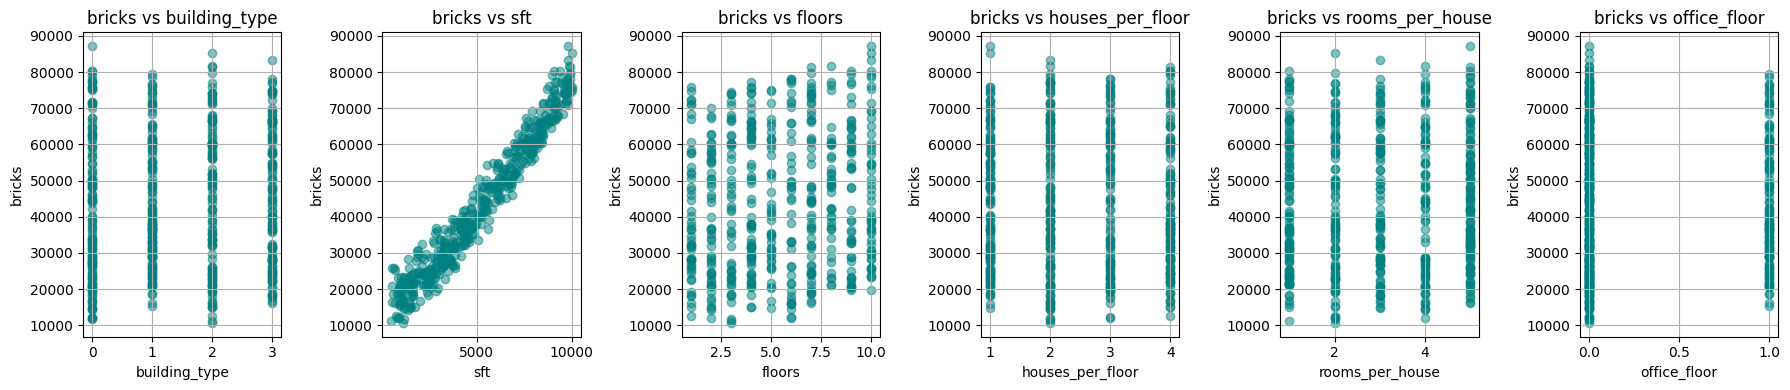

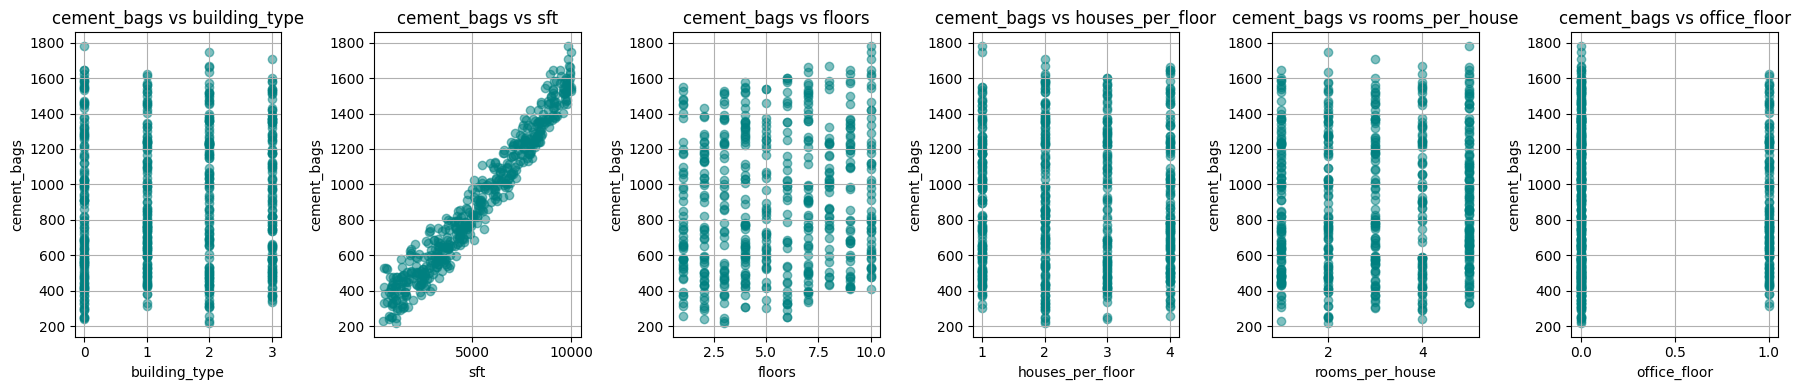

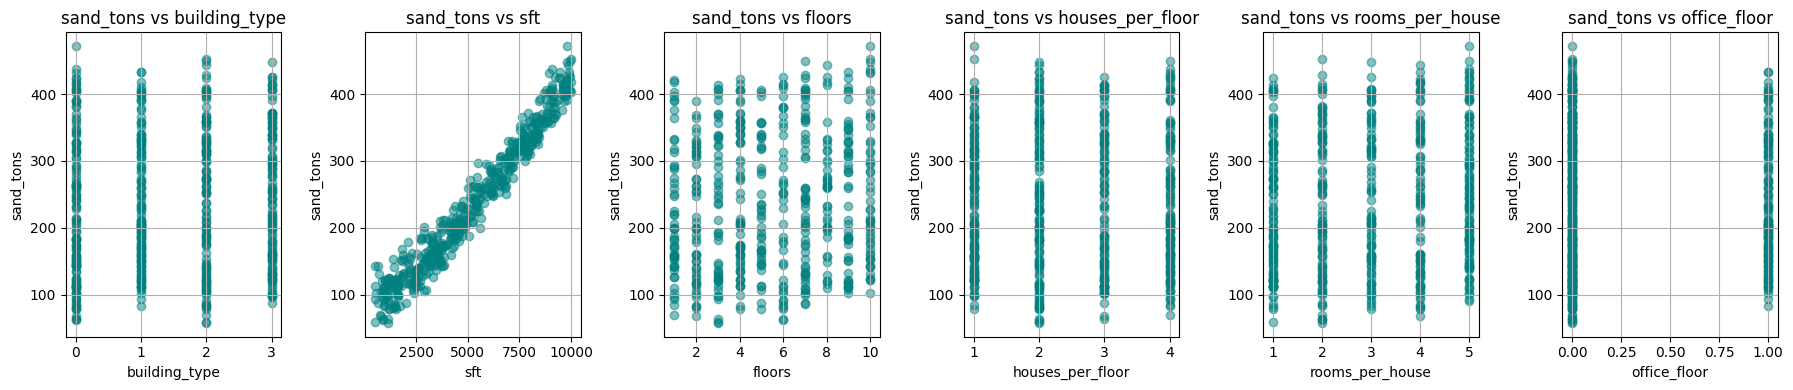

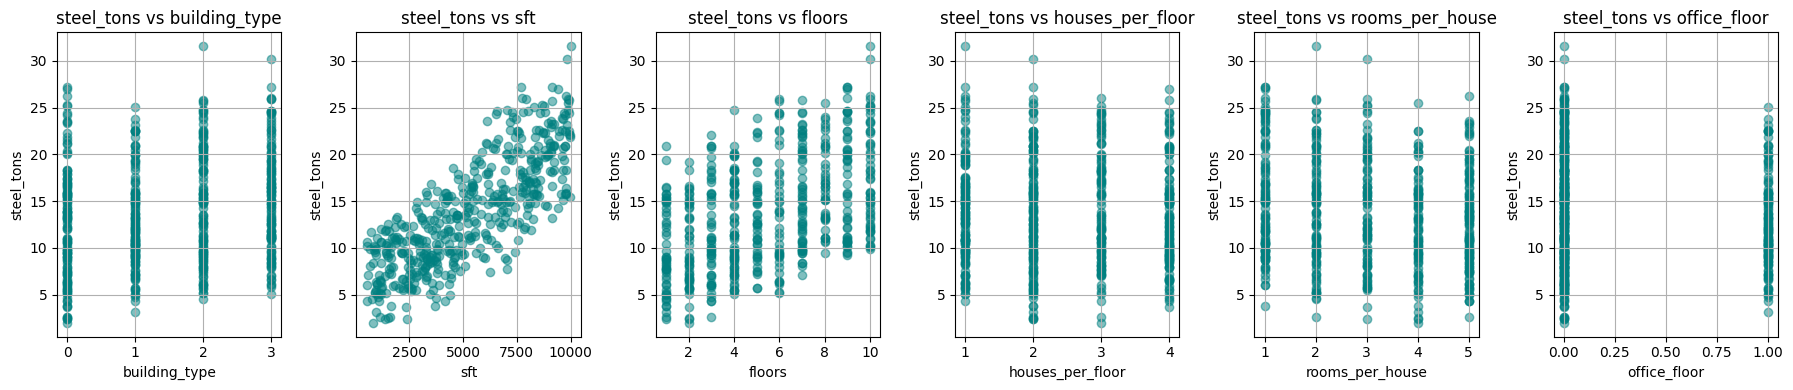

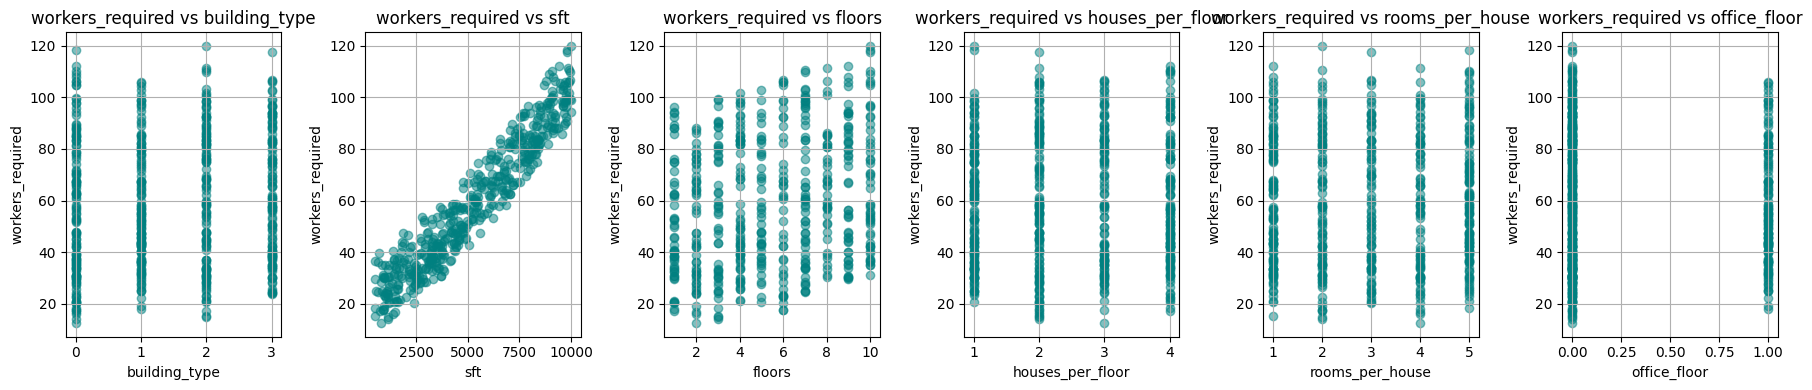

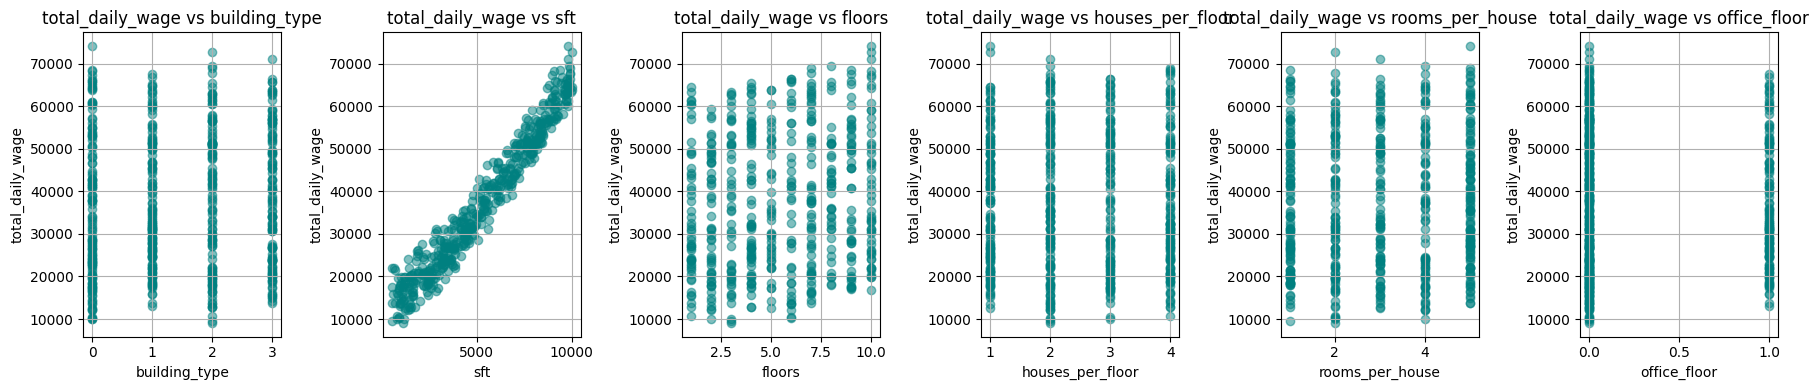

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("prediction.csv")
df['building_type'] = df['building_type'].astype('category').cat.codes
df['daily_wage_per_worker'] = df['daily_wage_per_worker'].replace('[\$,]', '', regex=True).astype(float)
df['total_daily_wage'] = df['total_daily_wage'].replace('[\$,]', '', regex=True).astype(float)
x = df[['building_type', 'sft', 'floors', 'houses_per_floor', 'rooms_per_house', 'office_floor']]
y = df[['bricks', 'cement_bags', 'sand_tons', 'steel_tons', 'workers_required', 'total_daily_wage']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
model = Sequential([
    Flatten(input_shape=(x_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='linear')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)
model.fit(x_train_scaled, y_train,
          validation_data=(x_test_scaled, y_test),
          epochs=100,
          callbacks=[early_stop, reduce_lr])
print("\nBuilding types:\n0: apartment\n1: apartment_with_office_floor\n2: independent_house\n3: office_building")
building_type = int(input("Enter the building type (0–3): "))
sft = int(input("Enter sft (100–10000): "))
floors = int(input("Enter number of floors: "))
houses_per_floor = int(input("Enter houses per floor: "))
rooms_per_house = int(input("Enter rooms per house: "))
office_floor = int(input("Enter office floors (0 or 1): "))
features = pd.DataFrame([[building_type, sft, floors, houses_per_floor, rooms_per_house, office_floor]],
                        columns=['building_type', 'sft', 'floors', 'houses_per_floor', 'rooms_per_house', 'office_floor'])
features_scaled = scaler_x.transform(features)
prediction = model.predict(features_scaled)
output_labels = ['bricks', 'cement_bags', 'sand_tons', 'steel_tons', 'workers_required', 'total_daily_wage']
print("\nPredicted Construction Requirements:")
for label, value in zip(output_labels, prediction[0]):
    print(f"{label}: {round(value, 2)}")
y_pred = model.predict(x_test_scaled)
input_features = x.columns.tolist()

for i, output_name in enumerate(output_labels):
    plt.figure(figsize=(18, 4))
    for j, input_name in enumerate(input_features):
        plt.subplot(1, len(input_features), j+1)
        plt.scatter(x_test[input_name], y_pred[:, i], alpha=0.5, color='teal')
        plt.xlabel(input_name)
        plt.ylabel(output_name)
        plt.title(f'{output_name} vs {input_name}')
        plt.grid(True)
    plt.tight_layout()
    plt.show()


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 652266368.0000 - mae: 13528.4648 - val_loss: 668015808.0000 - val_mae: 13677.9580 - learning_rate: 5.0000e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 654441792.0000 - mae: 13557.8174 - val_loss: 667648192.0000 - val_mae: 13668.7256 - learning_rate: 5.0000e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 650483776.0000 - mae: 13493.3584 - val_loss: 666665664.0000 - val_mae: 13646.0586 - learning_rate: 5.0000e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 655919808.0000 - mae: 13604.2373 - val_loss: 664661952.0000 - val_mae: 13604.5078 - learning_rate: 5.0000e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 652509184.0000 - mae: 13532.4873 - val_loss: 661279424.0000 - val_mae: 13542.8066 - learning_rate: 5.0000e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 649277312.0000 - mae: 13488.2080 - val_loss: 656154560.0000 - val_mae: 13454.3604 - learning_rat

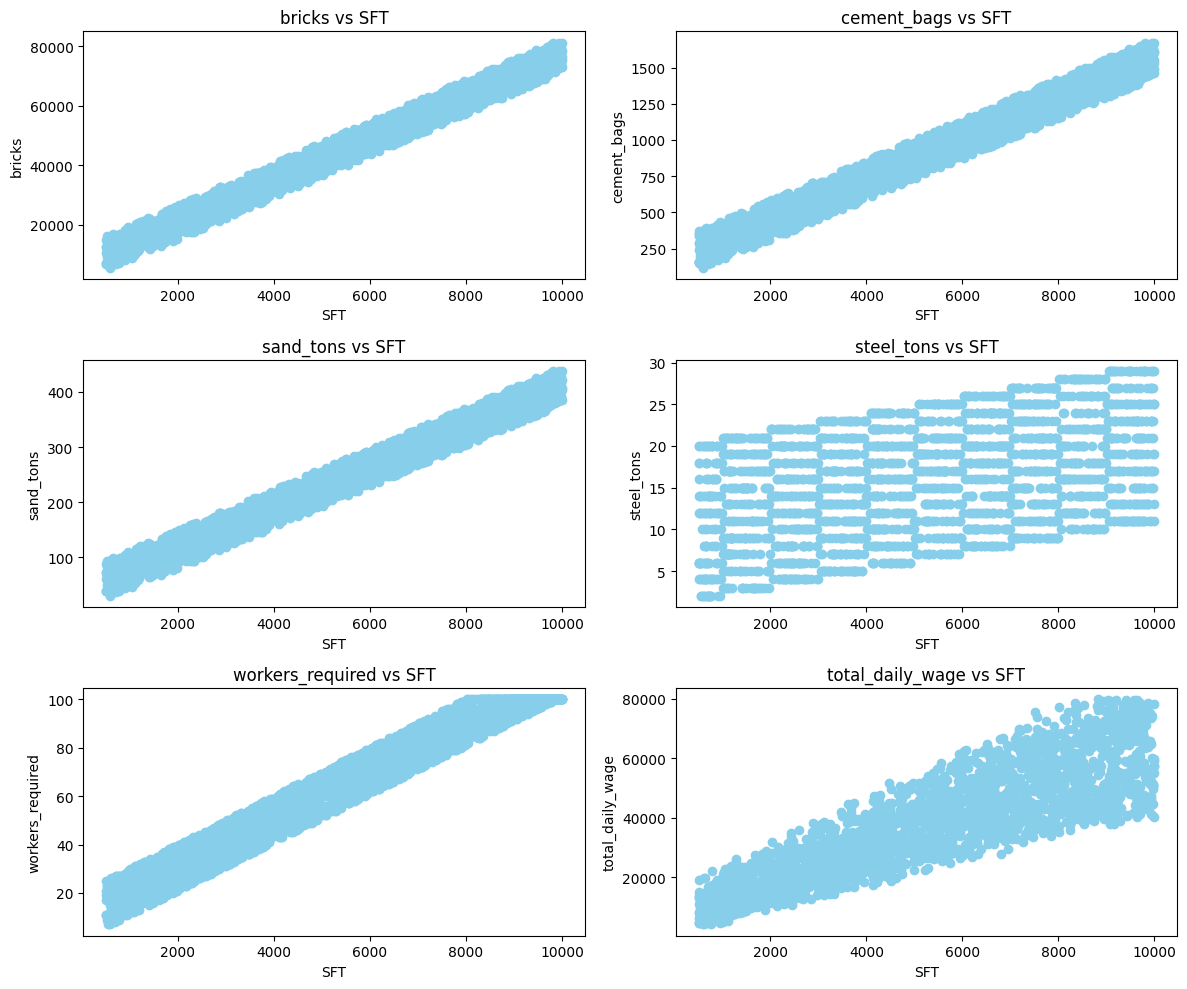

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
df = pd.read_csv("prediction.csv")
df['building_type'] = df['building_type'].astype('category').cat.codes
df['daily_wage_per_worker'] = df['daily_wage_per_worker'].replace('[\$,]', '', regex=True).astype(float)
df['total_daily_wage'] = df['total_daily_wage'].replace('[\$,]', '', regex=True).astype(float)
x = df[['building_type', 'sft', 'floors', 'houses_per_floor', 'rooms_per_house', 'office_floor']]
y = df[['bricks', 'cement_bags', 'sand_tons', 'steel_tons', 'workers_required', 'total_daily_wage']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6)  # 6 outputs
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mae']
)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)
history = model.fit(
    x_train_scaled,
    y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=100,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
print("\nBuilding type:\n0: apartment\n1: apartment_with_office_floor\n2: independent_house\n3: office_building")
building_type = int(input("Enter the building type (0-3): "))
sft = int(input("Enter the sft (100-10000): "))
floors = int(input("Enter number of floors: "))
houses_per_floor = int(input("Enter houses per floor (0 if independent house): "))
rooms_per_house = int(input("Enter number of rooms per house: "))
office_floor = int(input("Enter number of office floors (0 or 1): "))
input_features = pd.DataFrame([[building_type, sft, floors, houses_per_floor, rooms_per_house, office_floor]],
                              columns=x.columns)
input_scaled = scaler_x.transform(input_features)
prediction = model.predict(input_scaled)
output_labels = y.columns.tolist()
print("\nPredicted Construction Requirements:")
for label, value in zip(output_labels, prediction[0]):
    print(f"{label}: {round(value, 0)}")
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.ravel()
for i, label in enumerate(y.columns):
    axs[i].scatter(df['sft'], df[label], color='skyblue', label='True')
    axs[i].set_title(f"{label} vs SFT")
    axs[i].set_xlabel("SFT")
    axs[i].set_ylabel(label)
plt.tight_layout()
plt.show()
